# Machine Learning 

### 1. Introduction

I have already explored Logistic Regression in my feature engineering notebook, so in this section I will experiment with two alternative models — Random Forest and XGBoost — to see if they can provide higher predictive performance for my binary classification problem. Both models handle categorical and numerical data well, are robust to outliers, and provide insights into feature importance.

### 2. Import Libraries & Load Data

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load ML-ready dataset
df = pd.read_csv("../data/ml_ready_bank.csv")
df.head()

,y,age,balance,housing,loan,day,campaign,pdays,previous,was_previously_contacted,...,age_band_25-34,age_band_35-49,age_band_50-64,age_band_65+,age_band_<25,pdays_bucket_31–90d,pdays_bucket_8–30d,pdays_bucket_>90d,pdays_bucket_never,pdays_bucket_≤7d
0,1,1.491505,0.252525,1.055280,-0.387923,-1.265746,-0.554168,-0.481184,-0.36326,-0.583902,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.239676,-0.459974,-0.947616,-0.387923,-1.265746,-0.554168,-0.481184,-0.36326,-0.583902,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.019470,-0.080160,1.055280,-0.387923,-1.265746,-0.554168,-0.481184,-0.36326,-0.583902,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1.155733,0.293762,1.055280,-0.387923,-1.265746,-0.554168,-0.481184,-0.36326,-0.583902,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1.071790,-0.416876,-0.947616,-0.387923,-1.265746,-0.186785,-0.481184,-0.36326,-0.583902,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [2]:
# Clean column names for XGBoost compatibility
df.columns = df.columns.str.replace('[', '(', regex=False)
df.columns = df.columns.str.replace(']', ')', regex=False)
df.columns = df.columns.str.replace('<', 'lt_', regex=False)
df.columns = df.columns.str.replace('>', 'gt_', regex=False)
df.columns = df.columns.str.replace('≤', 'le_', regex=False)
df.columns = df.columns.str.replace('≥', 'ge_', regex=False)
df.columns = df.columns.str.replace('–', '-', regex=False)

df.head()

,y,age,balance,housing,loan,day,campaign,pdays,previous,was_previously_contacted,...,age_band_25-34,age_band_35-49,age_band_50-64,age_band_65+,age_band_lt_25,pdays_bucket_31-90d,pdays_bucket_8-30d,pdays_bucket_gt_90d,pdays_bucket_never,pdays_bucket_le_7d
0,1,1.491505,0.252525,1.055280,-0.387923,-1.265746,-0.554168,-0.481184,-0.36326,-0.583902,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.239676,-0.459974,-0.947616,-0.387923,-1.265746,-0.554168,-0.481184,-0.36326,-0.583902,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.019470,-0.080160,1.055280,-0.387923,-1.265746,-0.554168,-0.481184,-0.36326,-0.583902,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1.155733,0.293762,1.055280,-0.387923,-1.265746,-0.554168,-0.481184,-0.36326,-0.583902,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1.071790,-0.416876,-0.947616,-0.387923,-1.265746,-0.186785,-0.481184,-0.36326,-0.583902,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 3. Split Data into Train/Test Sets

In [3]:
# Features & target
X = df.drop('y', axis=1)
y = df['y']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 4. Model 1 – Random Forest Classifier

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1175
           1       0.75      0.64      0.69      1058

    accuracy                           0.73      2233
   macro avg       0.73      0.72      0.72      2233
weighted avg       0.73      0.73      0.72      2233



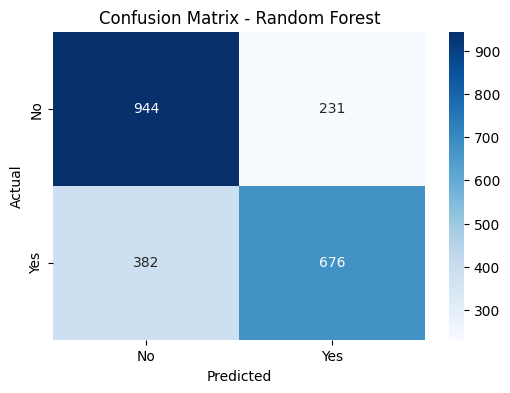

Top 10 Features - Random Forest:
             Feature  Importance
14   balance_per_age    0.101305
1            balance    0.099360
4                day    0.090073
0                age    0.088681
10    call_intensity    0.047258
5           campaign    0.038612
53  poutcome_success    0.028277
6              pdays    0.027994
11       month_index    0.026762
12         month_sin    0.026392


/var/folders/09/yd5kcn1539g31p80cnw4dmr80000gn/T/ipykernel_27426/3980630924.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_rf.head(10), x='Importance', y='Feature', palette='viridis')


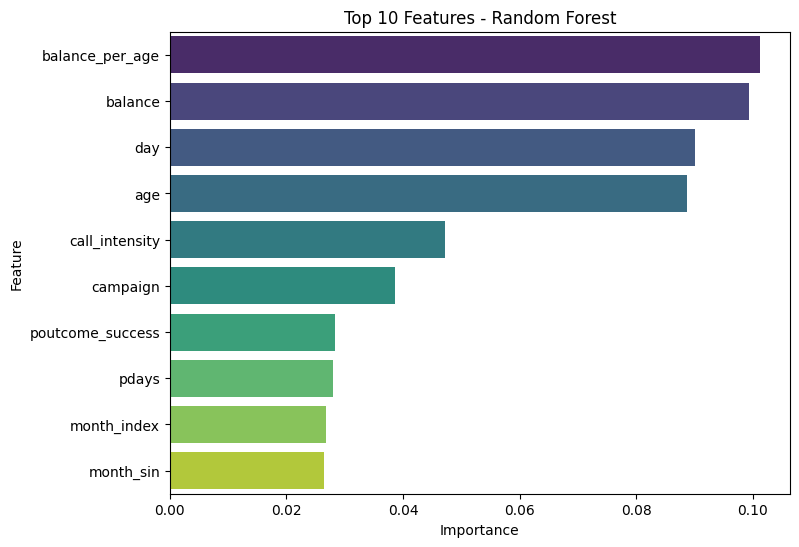

In [ ]:
# Train model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Feature Importance
importances_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 10 Features - Random Forest:")
print(importances_rf.head(10))

plt.figure(figsize=(8,6))
sns.barplot(data=importances_rf.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Features - Random Forest")
plt.show()
#**Code for this section was generated with assistance from GitHub Copilot (GitHub, 2025).**

### 5. Model 2 – XGBoost Classifier

/Users/aminaibrahim/Documents/vscode-projects/bank-marketing-analysis/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [04:34:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Classification Report
              precision    recall  f1-score   support

           0       0.71      0.85      0.78      1175
           1       0.79      0.62      0.70      1058

    accuracy                           0.74      2233
   macro avg       0.75      0.74      0.74      2233
weighted avg       0.75      0.74      0.74      2233



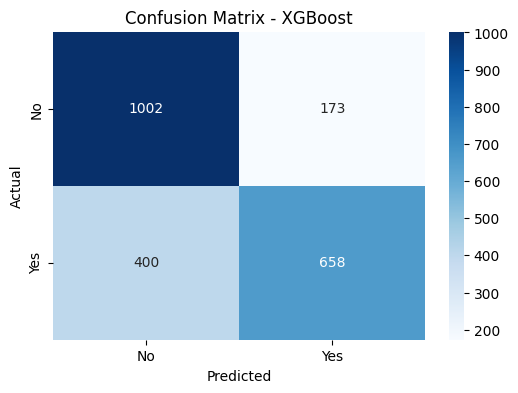

Top 10 Features - XGBoost:
             Feature  Importance
53  poutcome_success    0.368852
38   contact_unknown    0.163779
9       has_any_loan    0.043372
40         month_aug    0.029156
39         month_apr    0.025960
12         month_sin    0.023330
49         month_oct    0.023041
13         month_cos    0.017406
36  contact_cellular    0.014394
42         month_feb    0.013139


/var/folders/09/yd5kcn1539g31p80cnw4dmr80000gn/T/ipykernel_27426/2160916031.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_xgb.head(10), x='Importance', y='Feature', palette='mako')


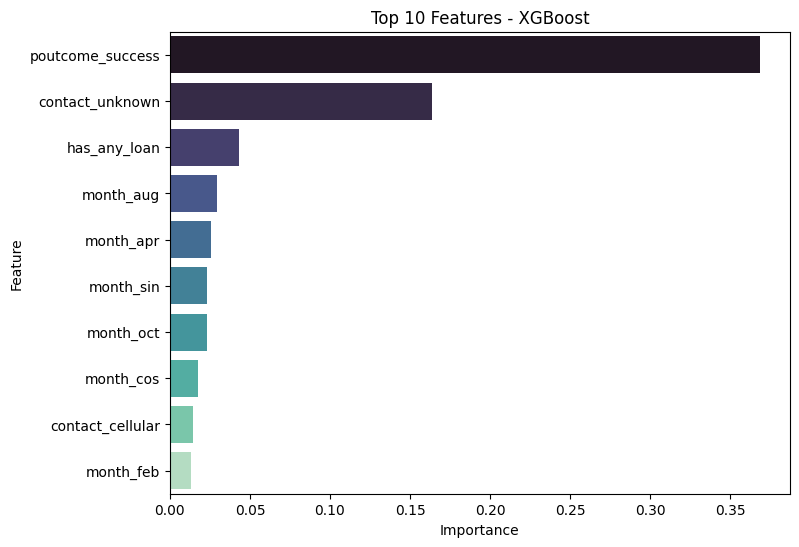

In [ ]:
# Train model
xgb_model = XGBClassifier(
    n_estimators=200, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost - Classification Report")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Feature Importance
importances_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 10 Features - XGBoost:")
print(importances_xgb.head(10))

plt.figure(figsize=(8,6))
sns.barplot(data=importances_xgb.head(10), x='Importance', y='Feature', palette='mako')
plt.title("Top 10 Features - XGBoost")
plt.show()
#**Code for this section was generated with assistance from GitHub Copilot (GitHub, 2025).**

### 6. Interpretation

Both Random Forest and XGBoost allow me to see which features contribute most to predicting whether a customer subscribes to a term deposit. I will compare the classification reports to determine which model performs better.

From the feature importance charts, I can identify the key drivers influencing the prediction — these insights will be useful for my dashboard and recommendations.

### 7. AI Tool Acknowledgement

I used ChatGPT (OpenAI, 2025) and GitHub Copilot (GitHub, 2025) to help with code structure, function selection, and optimisation ideas. While the decisions, analysis, and interpretations are my own, these tools assisted in speeding up the development process and refining code readability.